In [189]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import random
import matplotlib.image as mpimg
import cv2
from tensorflow import keras

from keras.models import Sequential

from keras.layers import Activation,Dropout,Flatten,Dense
from keras.layers  import Conv2D,MaxPooling2D
from keras.utils import image_dataset_from_directory
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing import image_dataset_from_directory



In [190]:

from os import listdir

folder_MONOCYTE = "images/TRAIN/MONOCYTE"
folder_LYMPHOCYTE = "images/TRAIN/LYMPHOCYTE"
folder_NEUTROPHIL = "images/TRAIN/NEUTROPHIL"
folder_EOSINOPHIL = "images/TRAIN/EOSINOPHIL"
class_label=['EOSINOPHIL','NEUTROPHIL','LYMPHOCYTE','MONOCYTE']





In [191]:
for i in range (len(class_label)):
    for images in os.listdir(f'images/TRAIN/{class_label[i]}'):

	    if (images.endswith(".jpeg")):
		    print(images)
    

_0_1169.jpeg
_0_1414.jpeg
_0_207.jpeg
_0_2142.jpeg
_0_2370.jpeg
_0_3072.jpeg
_0_4431.jpeg
_0_4480.jpeg
_0_4574.jpeg
_0_4747.jpeg
_0_5315.jpeg
_0_5472.jpeg
_0_5579.jpeg
_0_5702.jpeg
_0_6060.jpeg
_0_6149.jpeg
_0_6311.jpeg
_0_651.jpeg
_0_6628.jpeg
_0_6863.jpeg
_0_7353.jpeg
_0_7445.jpeg
_0_7721.jpeg
_0_7803.jpeg
_0_7902.jpeg
_0_797.jpeg
_0_7989.jpeg
_0_9044.jpeg
_0_9188.jpeg
_0_9211.jpeg
_0_9284.jpeg
_0_9508.jpeg
_0_9795.jpeg
_0_991.jpeg
_10_1654.jpeg
_10_1702.jpeg
_10_1786.jpeg
_10_1959.jpeg
_10_226.jpeg
_10_2291.jpeg
_10_2634.jpeg
_10_2656.jpeg
_10_3040.jpeg
_10_324.jpeg
_10_3486.jpeg
_10_3514.jpeg
_10_3660.jpeg
_10_3901.jpeg
_10_4755.jpeg
_10_4811.jpeg
_10_4909.jpeg
_10_495.jpeg
_10_5263.jpeg
_10_5540.jpeg
_10_5800.jpeg
_10_6184.jpeg
_10_6436.jpeg
_10_6635.jpeg
_10_672.jpeg
_10_6876.jpeg
_10_7316.jpeg
_10_7918.jpeg
_10_8348.jpeg
_10_8350.jpeg
_10_8793.jpeg
_10_9414.jpeg
_10_9573.jpeg
_11_1156.jpeg
_11_12.jpeg
_11_1255.jpeg
_11_1293.jpeg
_11_2298.jpeg
_11_2438.jpeg
_11_2454.jpeg
_11_2554

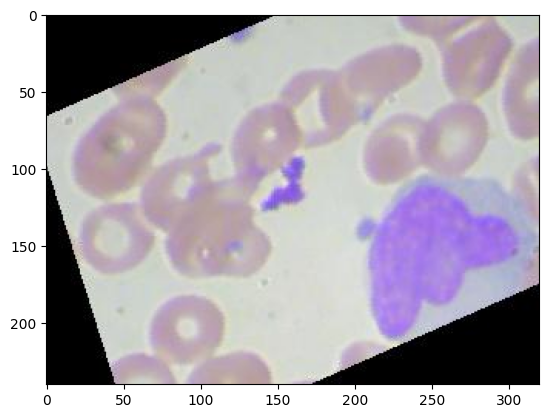

In [192]:
img=plt.imread('images/TRAIN/MONOCYTE/_0_1276.jpeg')
plt.imshow(img)

In [193]:
import cv2
import os
folder=f'images/TRAIN/{class_label[i]}'
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [194]:
print(load_images_from_folder)

<function load_images_from_folder at 0x000002491F9E72E0>


In [195]:
import os
path='images/TRAIN'

classes=os.listdir(path)
classes

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

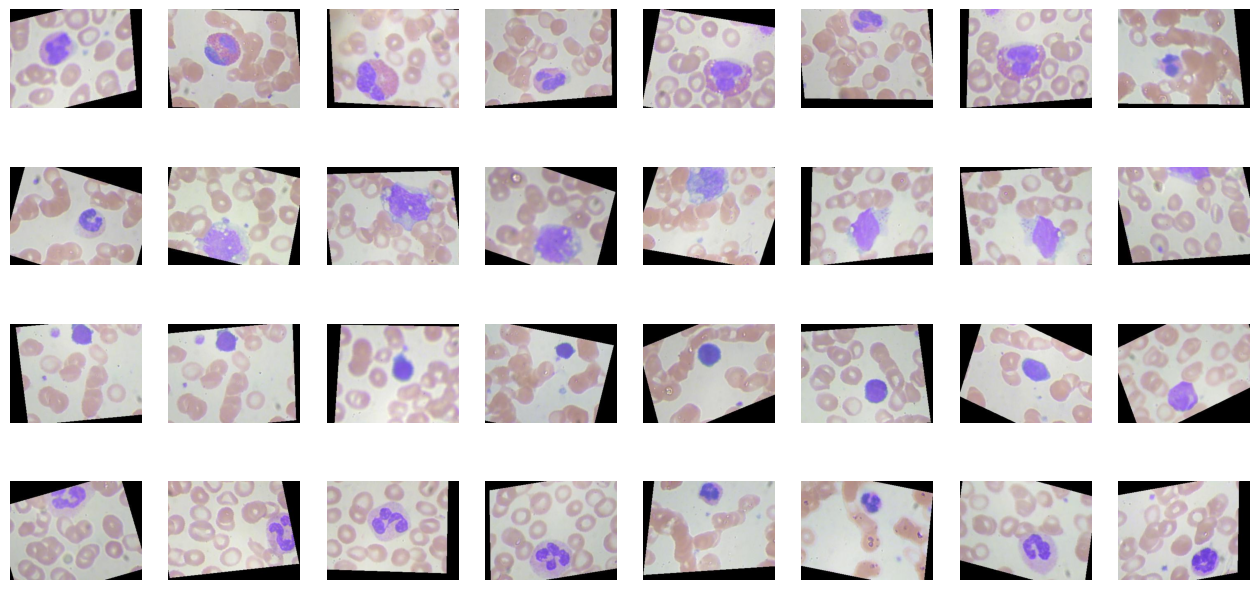

In [196]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
n_dir = os.path.join('images/TRAIN/NEUTROPHIL')
m_dir = os.path.join('images/TRAIN/MONOCYTE')
e_dir = os.path.join('images/TRAIN/EOSINOPHIL')
l_dir = os.path.join('images/TRAIN/LYMPHOCYTE')

l_names = os.listdir(l_dir)
n_names = os.listdir(n_dir)
m_names = os.listdir(m_dir)
e_names = os.listdir(e_dir)

pic_index = 210
  
l_images = [os.path.join(l_dir, fname)
              for fname in l_names[pic_index-8:pic_index]]
m_images = [os.path.join(m_dir, fname)
              for fname in m_names[pic_index-8:pic_index]]
e_images = [os.path.join(e_dir, fname)
              for fname in e_names[pic_index-8:pic_index]]
n_images = [os.path.join(n_dir, fname)
              for fname in n_names[pic_index-8:pic_index]]
for i, img_path in enumerate(e_images + m_images+l_images+n_images):
    sp = plt.subplot(8, 8, i+1)
    sp.axis('Off')
  
    img = mpimg.imread(img_path)
    plt.imshow(img)
  
plt.show()

In [197]:

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [198]:
base_dir='images/TRAIN'


train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(120,120),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                 batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(120,120),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)



Found 9957 files belonging to 4 classes.
Using 8962 files for training.
Found 9957 files belonging to 4 classes.
Using 995 files for validation.


In [199]:

#train_datagen = ImageDataGenerator(rescale = 1./255)
#test_datagen = ImageDataGenerator(rescale = 1./255)

In [200]:

#train_generator = train_datagen.flow_from_directory(
 #                 base_dir,
  #                target_size =(150, 150),  # target_size = input image size
   #               batch_size = 20,
    #              class_mode ='binary')
  
  
#test_generator = test_datagen.flow_from_directory(
 #                   base_dir,
  #                  target_size =(150, 150),
   #                 batch_size = 20,
    #                class_mode ='binary')

In [201]:
train_datagen

<_BatchDataset element_spec=(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [202]:
test_datagen

<_BatchDataset element_spec=(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [203]:
model=Sequential()


model.add(Conv2D(16,(2,2),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
#model.add(MaxPooling2D(2,2))
#model.add(Conv2D(64,(3,3),activation='relu'))
#model.add(MaxPooling2D(2,2))



model.add(Flatten())
model.add(Dense(512,activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.7))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
#model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
#model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))




In [204]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 119, 119, 16)      208       
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 59, 59, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_62 (Conv2D)          (None, 58, 58, 32)        2080      
                                                                 
 batch_normalization_38 (Ba  (None, 58, 58, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_58 (MaxPooli  (None, 29, 29, 32)        0         
 ng2D)                                                           
                                                     

In [207]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [208]:
model.fit(train_datagen,epochs=10,validation_data=test_datagen)

Epoch 1/10


281/281 [==============================] - 89s 306ms/step - loss: 1.4986 - accuracy: 0.2564 - val_loss: 1.3832 - val_accuracy: 0.2804
Epoch 2/10
281/281 [==============================] - 87s 309ms/step - loss: 1.3919 - accuracy: 0.2706 - val_loss: 1.3787 - val_accuracy: 0.2814
Epoch 3/10
281/281 [==============================] - 88s 312ms/step - loss: 1.2630 - accuracy: 0.3575 - val_loss: 16.6396 - val_accuracy: 0.2472
Epoch 4/10
281/281 [==============================] - 92s 326ms/step - loss: 1.1103 - accuracy: 0.4245 - val_loss: 9.5291 - val_accuracy: 0.2553
Epoch 5/10
281/281 [==============================] - 81s 287ms/step - loss: 1.0437 - accuracy: 0.4524 - val_loss: 1.0545 - val_accuracy: 0.4121
Epoch 6/10
281/281 [==============================] - 81s 289ms/step - loss: 0.9790 - accuracy: 0.4753 - val_loss: 1.3963 - val_accuracy: 0.4131
Epoch 7/10
281/281 [==============================] - 81s 289ms/step - loss: 0.9573 - accuracy: 0.4896 - val_loss: 3.2441 - val_accuracy: 0.

In [212]:
loss,acc_=model.evaluate(test_datagen)

In [210]:
print(f"The loss is: {loss}"," ",f"The Accuracy is: {acc_}")

The loss is: 3.920325756072998   The Accuracy is: 0.26432159543037415


In [214]:
model.save

<bound method Model.save of <keras.src.engine.sequential.Sequential object at 0x000002491F2BB0D0>>

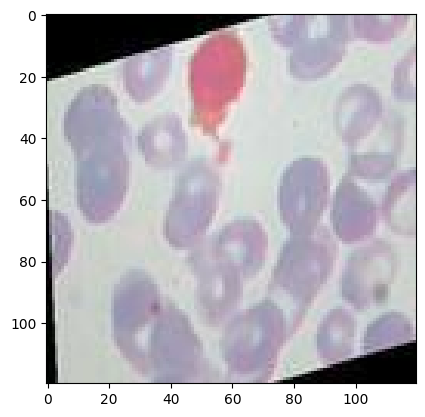

In [234]:
import cv2 as cv
img=plt.imread('bloodtestl.jpeg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap=plt.cm.binary)

In [229]:
img.shape

(120, 120, 3)

In [240]:
pred=model.predict(np.array([img])/255)
indx1=np.argmax(pred)
print(f'prediction is {class_label[indx1]}')



1/1 [==============================] - 0s 111ms/step
prediction is LYMPHOCYTE
